可視化方法としては

- 原子の位置は分子内の位置と同じように描画
- ビット情報の中心原子は薄い青丸で表現
- 芳香族原子は黄色い丸で表現
- 環状の脂肪族原子は灰色で表現
- 直接にはフィンガープリントに含まれないが，原子の- 結合タイプ決定に影響する部分を薄い灰色で表現

In [7]:
from rdkit import Chem, rdBase
from rdkit.Chem import Draw, AllChem
import pubchempy as pcp

In [8]:
taxol = pcp.get_compounds('taxol','name')
taxol = taxol[0]
taxol = Chem.MolFromSmiles(taxol.canonical_smiles)

In [15]:
print(rdBase.rdkitVersion) ### 2018.09.1

2022.03.5


In [19]:
bitI_morgan = {}
fp_morgan = AllChem.GetMorganFingerprintAsBitVect(taxol, 2, bitInfo=bitI_morgan)

bitI_rdkit = {}
fp_rdkit = AllChem.RDKFingerprint(taxol,bitInfo=bitI_rdkit)


In [21]:
print(fp_morgan.GetNumBits(),fp_morgan.GetNumOnBits()) ### 2048 86
print(len(bitI_morgan)) 

2048 86
86


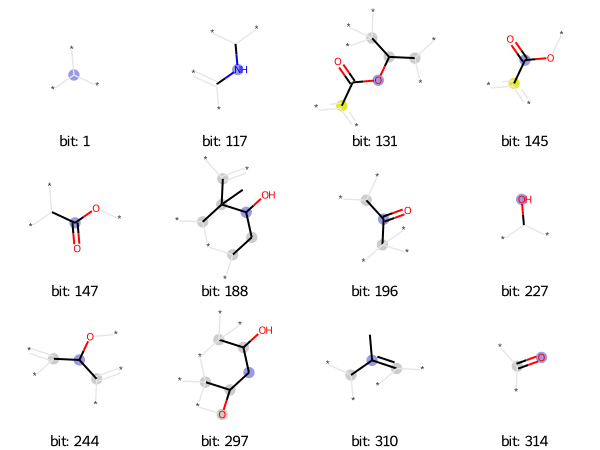

In [30]:
morgan_turples = ((taxol,bit,bitI_morgan) for bit in list(bitI_morgan.keys())[:12])
Draw.DrawMorganBits(morgan_turples, molsPerRow=4, legends=['bit: '+str(x) for x in list(bitI_morgan.keys())[:12]])